<a href="https://colab.research.google.com/github/ayucahyarani/Data-Mining/blob/main/New_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mengimplementasikan Konsep Segmentasi Pelanggan untuk menilai pelanggan mal berdasarkan perilaku dan data pembelian mereka.**

#**Import Library**

##**Core Library**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from google.colab import files

##**Library untuk Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

##**Library untuk Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

##**Library Untuk Build Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Segmentasi pelanggan di mal bertujuan untuk memahami cara pelanggan berbelanja di mal. Tujuan utamanya adalah untuk memahami pelanggan lebih baik, meningkatkan pengalaman berbelanja, dan meningkatkan keuntungan.

##**Assess Situation**

Di mal, pelanggan memiliki kebiasaan berbelanja yang beragam. Dengan data tentang pelanggan seperti usia, jenis kelamin, dan pola pembelian, kita bisa mengetahui lebih banyak tentang preferensi mereka dan bagaimana kita bisa melayani mereka lebih baik.

##**Data Mining Goals**

- Mengelompokkan pelanggan berdasarkan pola pembelian dan perilaku mereka.
- Mengidentifikasi kelompok pelanggan yang paling berharga untuk mal.
- Mempelajari faktor-faktor yang memengaruhi tingkat pengeluaran pelanggan.

##**Project Plan**

- Mengumpulkan data tentang pelanggan seperti usia, jenis kelamin, dan pola pembelian.
- Menganalisis data untuk melihat pola dan tren dalam perilaku belanja pelanggan.
- Mengelompokkan pelanggan berdasarkan perilaku belanja mereka.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset "Customer Segmentation" berasal dari Kaggle yang memberikan informasi tentang pelanggan di suatu mal. Dataset ini dikumpulkan oleh pengguna Kaggle dari mal tertentu untuk analisis segmentasi pelanggan.

Link dataset: https://www.kaggle.com/datasets/joebeachcapital/customer-segmentation

In [ ]:
cs = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/Data-Mining/main/Mall_Customers.csv')
cs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Describe Data**

###**Informasi Dasar**

In [ ]:
jumlah_baris, jumlah_kolom = cs.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 200
Jumlah kolom: 5


Dataset ini memiliki 200 baris dan 5 kolom. Artinya, terdapat 200 data pelanggan dalam dataset tersebut, yang dibagi ke dalam 5 kolom yang berbeda yang masing-masing menyimpan informasi seperti CustomerID, Gender, Age, Annual Income (k$), dan Spending Score (1-100).

###**Informasi Lanjutan**

In [ ]:
print(cs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Dataset ini memiliki 5 kolom dengan informasi sebagai berikut:

1. **CustomerID**: Kolom ini menyimpan ID unik untuk setiap pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

2. **Gender**: Kolom ini menyimpan informasi tentang jenis kelamin pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah objek (`object`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

3. **Age**: Kolom ini menyimpan informasi tentang usia pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

4. **Annual Income (k$)**: Kolom ini menyimpan informasi tentang pendapatan tahunan pelanggan dalam ribu dolar. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

5. **Spending Score (1-100)**: Kolom ini menyimpan informasi tentang skor pengeluaran pelanggan dalam skala 1-100. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

###**Informasi Statistik Deskriptif**

In [ ]:
print(cs.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Berikut adalah penjelasan statistik deskriptif untuk setiap kolom numerik dalam dataset:

**1. CustomerID:**

* **Mean:** Rata-rata ID pelanggan (100.500)
* **Std:** Standar deviasi ID pelanggan (57.879)
* **Min:** ID pelanggan terkecil (1)
* **25%:** 25% ID pelanggan terendah (50.750)
* **50%:** Median ID pelanggan (100.500)
* **75%:** 75% ID pelanggan terendah (150.250)
* **Max:** ID pelanggan terbesar (200.000)

**2. Age:**

* **Mean:** Rata-rata usia pelanggan (38.85 tahun)
* **Std:** Standar deviasi usia pelanggan (13.969 tahun)
* **Min:** Usia pelanggan termuda (18 tahun)
* **25%:** 25% pelanggan termuda (28.75 tahun)
* **50%:** Usia median pelanggan (36 tahun)
* **75%:** 75% pelanggan termuda (49 tahun)
* **Max:** Usia pelanggan tertua (70 tahun)

**3. Annual Income (k$)**:

* **Mean:** Rata-rata pendapatan tahunan pelanggan (60.560 dolar)
* **Std:** Standar deviasi pendapatan tahunan pelanggan (26.265 dolar)
* **Min:** Pendapatan tahunan terendah (15.000 dolar)
* **25%:** 25% pelanggan dengan pendapatan terendah (41.500 dolar)
* **50%:** Median pendapatan tahunan pelanggan (61.500 USD)
* **75%:** 75% pelanggan dengan pendapatan terendah (78.000 dolar)
* **Max:** Pendapatan tahunan tertinggi (137.000 dolar)

**4. Spending Score (1-100)**:

* **Mean:** Rata-rata skor pengeluaran pelanggan (50.20)
* **Std:** Standar deviasi skor pengeluaran pelanggan (25.824)
* **Min:** Skor pengeluaran terendah (1)
* **25%:** 25% pelanggan dengan skor pengeluaran terendah (34.75)
* **50%:** Median skor pengeluaran pelanggan (50)
* **75%:** 75% pelanggan dengan skor pengeluaran terendah (73)
* **Max:** Skor pengeluaran tertinggi (99)

##**Exploratory Data Analysis**

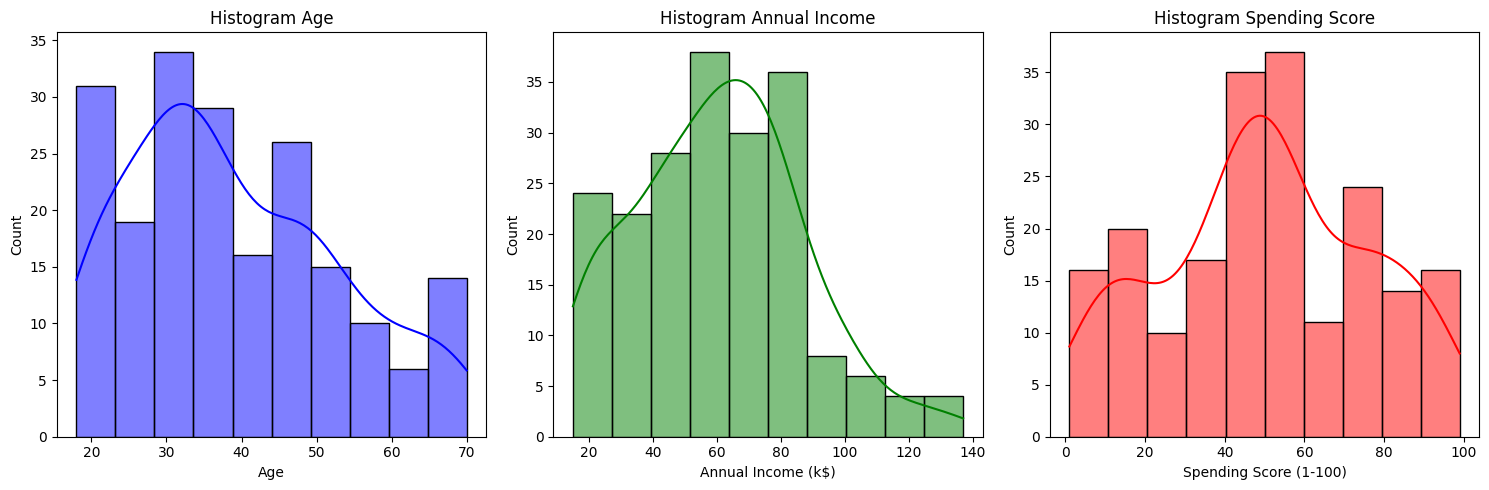

In [ ]:
#Distribution Plots

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(cs['Age'], bins=10, kde=True, color='blue')
plt.title('Histogram Age')

plt.subplot(1, 3, 2)
sns.histplot(cs['Annual Income (k$)'], bins=10, kde=True, color='green')
plt.title('Histogram Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(cs['Spending Score (1-100)'], bins=10, kde=True, color='red')
plt.title('Histogram Spending Score')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat tiga Distribution Plots yang menunjukkan:

- **Age**: Distribusi usia berbentuk miring kanan dengan mayoritas orang berada di usia 20-an dan 30-an. Jumlah orang berkurang seiring dengan bertambahnya usia.
- **Annual Income (k$)**: Distribusi pendapatan tahunan rata-rata berbentuk miring kanan dengan mayoritas orang memiliki pendapatan di kisaran 50.000 - 100.000 dolar per tahun. Ada beberapa orang dengan pendapatan yang sangat tinggi (di atas 140.000 dolar per tahun).
- **Spending Score (1-100)**: Distribusi skor pengeluaran terdistribusi secara normal dengan mayoritas orang memiliki skor di kisaran 40-60.

<ipython-input-10-b54b5cf43600>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cs.corr().round(2), annot=True, cmap='Blues')


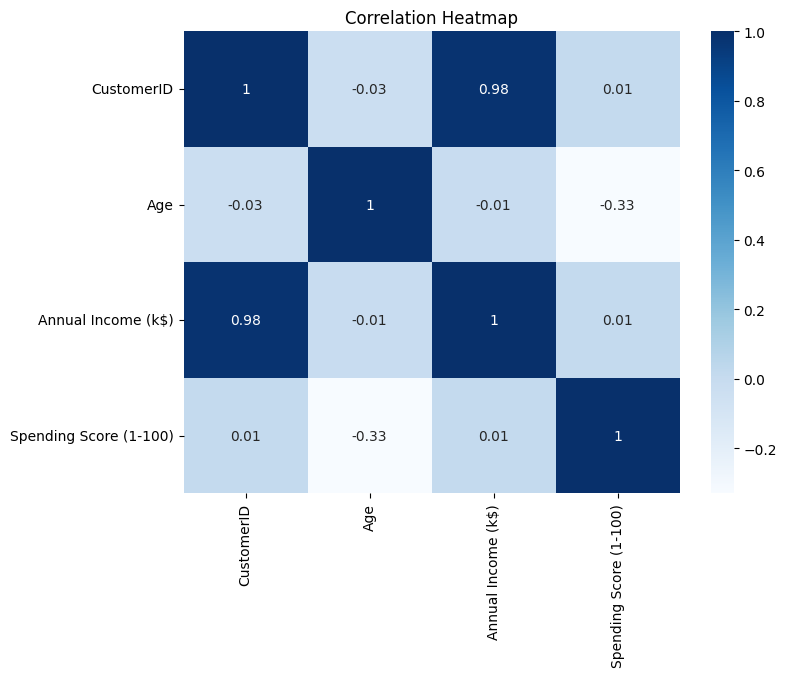

In [ ]:
#Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cs.corr().round(2), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')

plt.show()

Berdasarkan gambar, terdapat Heatmap yang menunjukkan:

- **CustomerID**: Tidak memiliki korelasi yang kuat dengan variabel lain.
- **Age**: Memiliki korelasi negatif yang lemah dengan Spending Score (1-100). Artinya, semakin tua seseorang, semakin kecil kemungkinan mereka untuk menghabiskan banyak uang.
- **Annual Income (k$)**: Memiliki korelasi positif yang kuat dengan Spending Score (1-100). Artinya, semakin tinggi pendapatan seseorang, semakin besar kemungkinan mereka untuk menghabiskan banyak uang.

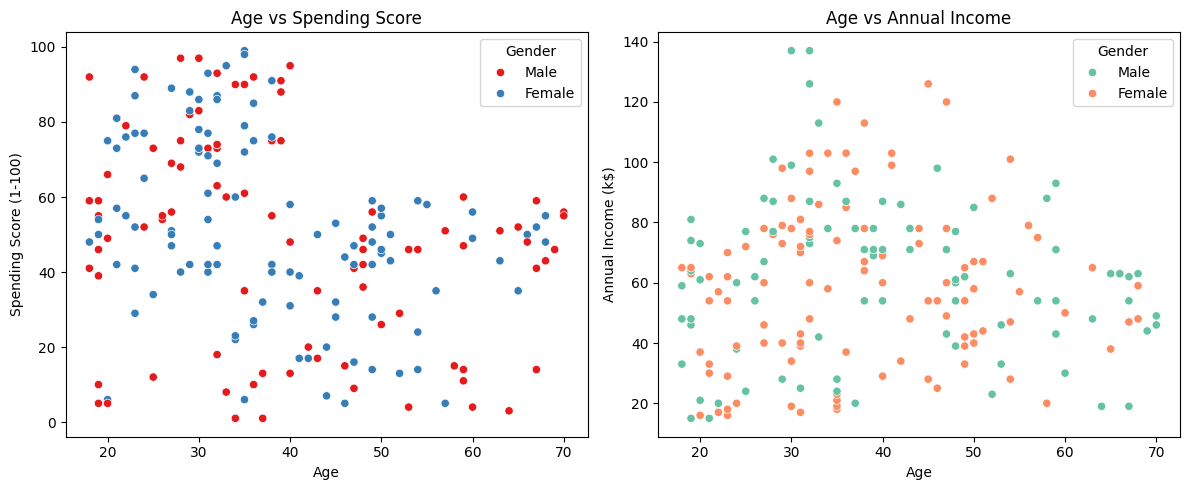

In [ ]:
#Scatterplot

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=cs, x='Age', y='Spending Score (1-100)', hue='Gender', palette='Set1')
plt.title('Age vs Spending Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=cs, x='Age', y='Annual Income (k$)', hue='Gender', palette='Set2')
plt.title('Age vs Annual Income')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat dua Scatterplot yang menunjukkan:

- **Age vs Spending Score**: Terdapat korelasi negatif yang lemah antara usia dan skor pengeluaran. Artinya, seiring bertambahnya usia, skor pengeluaran cenderung meningkat. Pola penyebaran data menunjukkan banyak variasi dalam skor pengeluaran untuk setiap kelompok usia.
- **Age vs Annual Income**: Terdapat korelasi positif yang kuat antara usia dan pendapatan tahunan rata-rata. Artinya, seiring bertambahnya usia, penghasilan tahunan cenderung meningkat secara signifikan. Pola penyebaran data menunjukkan variasi yang lebih kecil dalam penghasilan tahunan dibandingkan skor pengeluaran.

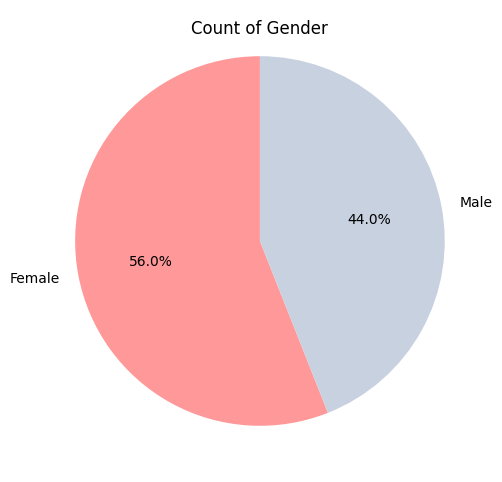

In [ ]:
#Pie Chart

gender_counts = cs['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#c7d1e0'])
plt.title('Count of Gender', y=0.93)
plt.show()

Berdasarkan gambar, terdapat Pie Chart yang menunjukkan jumlah pelanggan terbanyak berdasarkan gender adalah perempuan, yaitu sebanyak 56%.

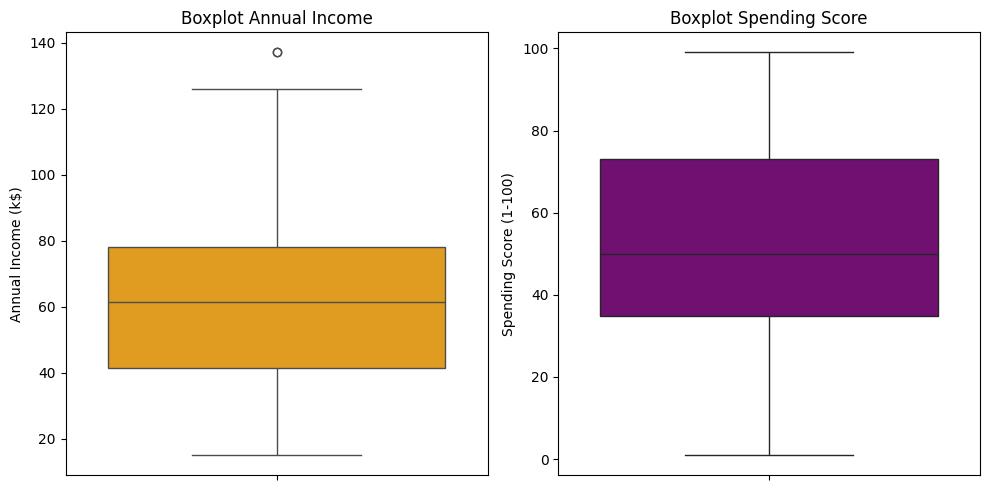

In [ ]:
#Boxplot

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='Annual Income (k$)', data=cs, color='orange')
plt.title('Boxplot Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(y='Spending Score (1-100)', data=cs, color='purple')
plt.title('Boxplot Spending Score')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat dua Boxplot yang menunjukkan:

- **Annual Income**: Median pendapatan tahunan adalah sekitar 80.000 dolar dan sebagian besar pendapatan tahunan berada antara 60.000 dan 100.000 dolar.
- **Spending Score**: Median skor pengeluaran adalah sekitar 60 dan sebagian besar skor pengeluaran berada antara 40 dan 80.

Secara umum, pelanggan dalam mal ini memiliki pendapatan tahunan yang lebih tinggi daripada skor pengeluaran mereka.

##**Verify Data Quality**

###**Missing Values**

In [ ]:
nama_kolom = cs.columns[cs.isnull().any()]
if nama_kolom.empty:
    print("Tidak ada nilai kosong pada dataset.")
else:
    print("Kolom dengan nilai kosong:", nama_kolom)

Tidak ada nilai kosong pada dataset.


Dalam dataset ini setiap kolom dan baris memiliki nilai yang terisi lengkap. Tidak ada bagian dari dataset yang kosong atau tidak memiliki nilai.

###**Outliers Values**

In [ ]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),1.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers pada dataset ini, terlihat bahwa hanya kolom "Annual Income (k$)" yang memiliki outliers, dengan persentase sebesar 1.0. Artinya, terdapat sebagian kecil dari data pada kolom Annual Income yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data. Sementara itu, kolom lainnya tidak memiliki outliers berdasarkan batasan yang ditentukan.

###**Duplicated Values**

In [ ]:
result_data = []

for col in cs.columns:
    is_duplicated = 'Ya' if cs[col].duplicated().any() else 'Tidak'
    result_data.append({'Kolom': col, 'Duplikat': is_duplicated})

result_cs = pd.DataFrame(result_data)
print(result_cs)

                    Kolom Duplikat
0              CustomerID    Tidak
1                  Gender       Ya
2                     Age       Ya
3      Annual Income (k$)       Ya
4  Spending Score (1-100)       Ya


Berdasarkan kolom pada dataset ini, terlihat bahwa ada nilai duplikat pada kolom "Gender", "Age", "Annual Income (k$)", dan "Spending Score (1-100)". Yang berarti ada nilai yang sama muncul lebih dari sekali dalam setiap kolom yang disebutkan di atas. Sedangkan untuk kolom "CustomerID", tidak ada nilai yang sama yang muncul lebih dari sekali, yang berarti setiap ID pelanggan unik.

###**Inconsistent Values / Noise (Optional)**

In [ ]:
for column in cs.columns:
    print(f"Column: {column}")
    unique_values_count = len(cs[column].unique())
    print(f"Jumlah Nilai Unik: {unique_values_count}")
    print()

Column: CustomerID
Jumlah Nilai Unik: 200

Column: Gender
Jumlah Nilai Unik: 2

Column: Age
Jumlah Nilai Unik: 51

Column: Annual Income (k$)
Jumlah Nilai Unik: 64

Column: Spending Score (1-100)
Jumlah Nilai Unik: 84



Berdasarkan analisis nilai inkonsisten / noise pada dataset ini menunjukkan:
- Kolom **CustomerID** memiliki nilai unik sebanyak 200, menunjukkan bahwa tidak ada duplikasi data.
- Kolom **Gender** memiliki nilai unik sebanyak 2, menunjukkan hanya ada dua jenis kelamin yang terdaftar (male dan female).
- Kolom **Age** memiliki nilai unik sebanyak 51, menunjukkan rentang usia yang cukup luas (dari 18 hingga 70 tahun) dengan 51 kemungkinan usia.
- Kolom **Annual Income (k$)** memiliki 64 nilai unik, menunjukkan kemungkinan adanya nilai inkonsisten / noise. Rentang pendapatan yang luas (dari 15.000 hingga 137.000 dolar) dengan 64 kemungkinan nilai, menandakan kemungkinan adanya data yang tidak konsisten.
- Kolom **Spending Score (1-100)** memiliki 84 nilai unik, menunjukkan kemungkinan adanya nilai inkonsisten / noise. Rentang skor yang luas (dari 1 hingga 99) dengan 84 kemungkinan nilai, menandakan kemungkinan adanya data yang tidak konsisten.

#**DATA PREPARATION**

##**Data Cleaning**

###**Pengecekkan Missing Values**

In [ ]:
print((cs.isna().sum() / len(cs)) * 100)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


Dalam dataset ini setiap kolom dan baris memiliki nilai yang terisi lengkap. Tidak ada bagian dari dataset yang kosong atau tidak memiliki nilai.

###**Pengecekkan Duplicated Values**

In [ ]:
cs[cs.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Dalam dataset ini setiap baris data memiliki kombinasi nilai yang unik untuk setiap kolomnya, jadi tidak ada baris data yang dianggap duplikat.

##**Pengecekkan Outliers**

In [ ]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),1.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers pada dataset ini, terlihat bahwa hanya kolom "Annual Income (k$)" yang memiliki outliers, dengan persentase sebesar 1.0. Artinya, terdapat sebagian kecil dari data pada kolom Annual Income yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data. Sementara itu, kolom lainnya tidak memiliki outliers berdasarkan batasan yang ditentukan.

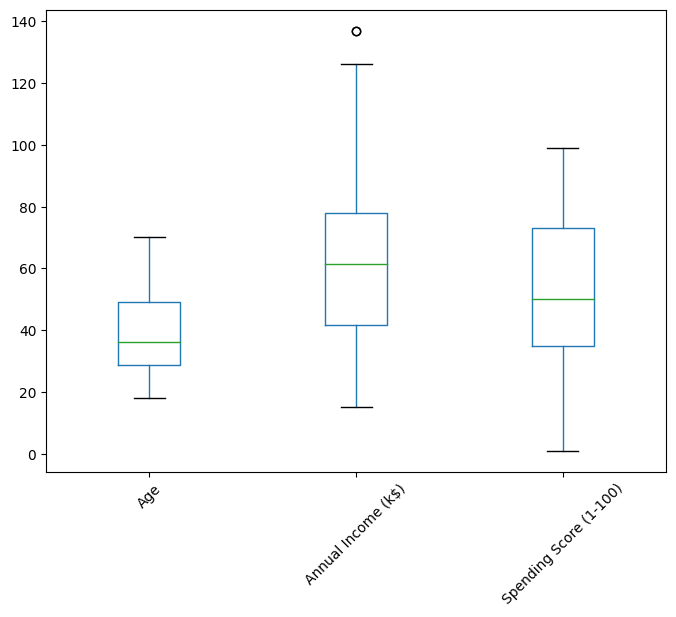

In [ ]:
boxplot = cs.drop('CustomerID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan gambar, terdapat boxplot yang menunjukkan:

Kolom "Annual Income (k$)" memiliki beberapa orang yang pendapatan tahunannya jauh lebih tinggi dibandingkan dengan orang lain pada umumnya. Outliers ini terletak di luar batas interkuartil (IQR), yang diwakili oleh garis kotak pada grafik.

####**Hapus Outliers**

Melakukan penghapusan baris pada kolom "Annual Income (k$)" untuk menanganani outliers

In [ ]:
Q1 = cs['Annual Income (k$)'].quantile(0.25)
Q3 = cs['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cs = cs[(cs['Annual Income (k$)'] >= lower_bound) & (cs['Annual Income (k$)'] <= upper_bound)]

####**Pengecekkan Ulang**

In [ ]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers setelah dilakukan penghapusan outliers, dapat dilihat bahwa kolom "Annual Income (k$)" sudah tidak memiliki outliers. Artinya data ini dapat memberikan gambaran yang lebih akurat tentang pendapatan tahunan rata-rata di setiap kelompok usia.

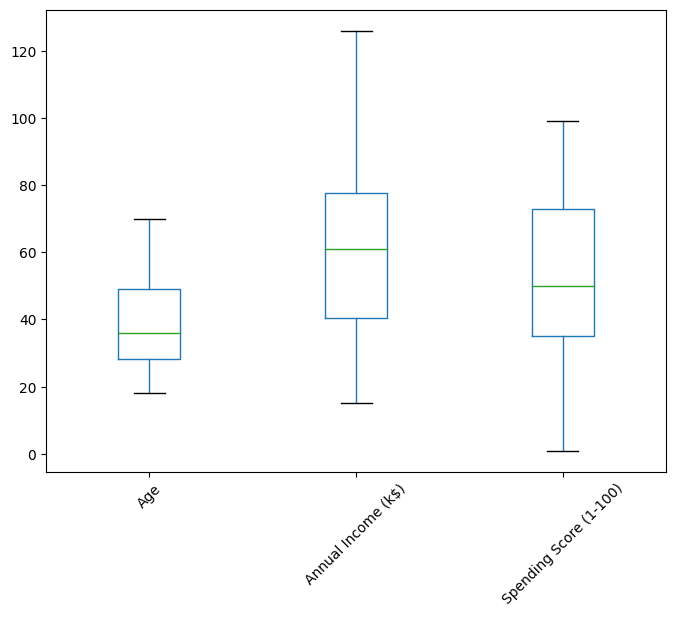

In [ ]:
boxplot = cs.drop('CustomerID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan gambar, terdapat boxplot yang menunjukkan penghapusan outlier menyebabkan perubahan pada distribusi pendapatan tahunan:

- **Kelompok usia 20-30 tahun**: Batas kotak atas dan bawah turun, menunjukkan pendapatan tahunan yang lebih terkonsentrasi.
- **Kelompok usia 40-50 tahun**: Batas kotak atas turun, menunjukkan pendapatan tahunan maksimum yang lebih rendah.
- **Kelompok usia 60-70 tahun**: Median income turun, menunjukkan pendapatan tahunan rata-rata yang lebih rendah.

##**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

 Menambahkan kolom "Income Category" yang bertujuan agar data lebih terstruktur dan mudah dipahami. Dengan kolom ini, pengguna bisa menganalisis data dengan lebih baik untuk melihat pola atau tren dalam pendapatan tahunan. Kategori ini juga membantu dalam segmentasi pelanggan berdasarkan pendapatannya, yang bisa membantu dalam membuat strategi pemasaran atau keputusan bisnis.

In [ ]:
def categorize_income(income):
    if 15 <= income <= 30:
        return 'Low'
    elif 31 <= income <= 60:
        return 'Medium'
    elif 61 <= income <= 100:
        return 'High'
    elif 101 <= income <= 137:
        return 'Very High'
    else:
        return 'Unknown'

cs['Income Category'] = cs['Annual Income (k$)'].apply(categorize_income)

###**Pengecekkan Hasil**

In [ ]:
cs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,Male,19,15,39,Low
1,2,Male,21,15,81,Low
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,Low
4,5,Female,31,17,40,Low


Berdasarkan dataset tersebut, dapat dilihat bahwa kolom "Income Category" sudah berhasil ditambahkan dalam dataset ini.

##**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
cs_corr = cs.corr(numeric_only=True)
px.imshow(cs_corr)

Berdasarkan gambar, terdapat Heatmap yang menunjukkan:

Kolom "CustomerID" tidak memiliki hubungan yang kuat dengan kolom lain. Hal ini terlihat dari warna kuning pada heatmap pada baris dan kolom CustomerID. Oleh karena itu, kolom CustomerID akan dihapus untuk meningkatkan efisiensi analisis.

In [ ]:
cs = cs.drop(['CustomerID'], axis=1)

Dalam dataset ini kolom "CustomerID" hanya berperan sebagai identifikasi unik untuk setiap entitas dalam dataset dan tidak memiliki hubungan yang kuat dengan kolom lain. Dengan demikian, menghapus kolom ini dapat mengurangi kompleksitas dataset, menghemat ruang penyimpanan, dan mempercepat proses analisis karena ukuran dataset menjadi lebih kecil.

###**Pengecekkan Hasil**

In [ ]:
cs.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,Male,19,15,39,Low
1,Male,21,15,81,Low
2,Female,20,16,6,Low
3,Female,23,16,77,Low
4,Female,31,17,40,Low


Berdasarkan dataset tersebut, dapat dilihat bahwa kolom "CustomerID" sudah berhasil dihapus dari dataset ini.

##**Data Transformation**

###**Mapping**

Mapping dilakukan pada kolom:
- **Gender**: mengubah nilai kolom menjadi numerik, dengan 'Male' menjadi 1 dan 'Female' menjadi 0.
- **Income Category**: mengubah nilai kolom menjadi numerik, dengan 'Low' menjadi 0, 'Medium' menjadi 1, 'High' menjadi 2, dan 'Very High' menjadi 3

In [ ]:
cs['Gender'] = cs['Gender'].map({'Male':1,'Female':0})
cs['Income Category'] = cs['Income Category'].map({'Low': 0, 'Medium': 1,'High': 2, 'Very High': 3}).astype(int)

In [ ]:
cs

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
193,0,38,113,91,3
194,0,47,120,16,3
195,0,35,120,79,3
196,0,45,126,28,3


###**Encoding**

Mengonversi variabel kategori menjadi bentuk biner (dummy variables) dalam bentuk matriks 0 dan 1. Hal ini memungkinkan algoritma machine learning untuk memahami dan memproses variabel kategori, sehingga meningkatkan kemampuan model untuk melakukan prediksi dan analisis data.

In [ ]:
cs = pd.get_dummies(cs)

###**Pengecekkan Hasil**

In [ ]:
cs.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


Berdasarkan dataset tersebut, dapat dilihat bahwa setelah melakukan encoding tidak ada perubahan pada data, karena encoding secara otomatis mengenali kolom-kolom yang sudah dalam bentuk numerik dan tidak memerlukan encoding tambahan.

##**Konversi DataFrame**

Menyimpan data set yang telah dibersihkan ke file CSV baru.

In [ ]:
#files.download("Data_Cleaned.csv")

#**SELECT MODELLING TECHNIQUES**

Dalam implementasi konsep segmentasi pelanggan berdasarkan perilaku dan data pembelian, metode yang digunakan adalah **Modelling Predict**. Metode ini membangun model untuk memprediksi perilaku belanja pelanggan berdasarkan usia, jenis kelamin, pendapatan tahunan, dan skor pengeluaran. Dengan menggunakan metode ini, segmentasi pelanggan dapat dilakukan secara lebih spesifik dan akurat, dengan penyesuaian yang lebih baik dan analisis berkelanjutan. Hal ini membantu optimalisasi strategi pemasaran dan layanan untuk meningkatkan pengalaman pelanggan dan hasil bisnis.

##**Inisiasi Variabel untuk Menyimpan Dataframe pada Modelling**

In [ ]:
cs2 = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/Data-Mining/main/Data_Cleaned.csv')
cs2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


##**Pre-Processing**

###**Split Data**

Split data dilakukan untuk membagi dataset menjadi dua bagian: data yang digunakan untuk melatih model (data latih) dan data yang digunakan untuk menguji model (data uji). Hal ini penting agar model dapat belajar dari data yang sudah ada dan diuji pada data yang belum pernah dilihat sebelumnya, sehingga dapat memprediksi dengan baik pada situasi yang sebenarnya.

In [ ]:
x = cs2.drop('Gender', axis=1)
y = cs2['Gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Pada dataset ini digunakan kolom **Gender** untuk split data agar dapat memahami perbedaan cara belanja antara pria dan wanita. Dengan cara ini, analisis dapat dibuat lebih akurat tentang apa yang disukai oleh setiap jenis kelamin dalam berbelanja. Hal ini akan membantu mengatur strategi pemasaran yang lebih tepat dan meningkatkan pengalaman serta hasil bisnis dengan lebih efektif.

In [ ]:
x_test

,Age,Annual Income (k$),Spending Score (1-100),Income Category
95,24,60,52,1
15,22,20,79,0
30,60,30,4,0
158,34,78,1,2
128,59,71,11,2
115,19,65,50,2
69,32,48,47,1
170,40,87,13,2
174,52,88,13,2
45,24,39,65,1


In [ ]:
y_test

95     1
15     1
30     1
158    1
128    1
115    0
69     0
170    1
174    0
45     0
66     0
182    1
165    0
78     0
186    0
177    1
56     0
152    0
82     1
68     1
124    0
16     0
148    0
93     0
65     1
60     1
84     0
67     0
125    0
132    0
9      0
18     1
55     1
75     1
150    1
104    1
135    0
137    1
164    1
76     0
79     0
197    1
38     0
24     0
122    0
195    0
29     0
19     0
143    0
86     0
114    0
173    1
5      0
126    1
117    0
73     0
140    0
98     1
172    1
96     0
Name: Gender, dtype: int64

###**Normalisasi Data**

Normalisasi data dilakukan agar semua fitur memiliki ukuran yang seimbang dan tidak mendominasi satu sama lain. Hal ini penting karena beberapa algoritma pembelajaran mesin bisa menjadi "bingung" jika terdapat fitur dengan nilai yang jauh lebih besar dari yang lain. Dengan menggunakan `MinMaxScaler()`, dapat membuat semua nilai fitur berada dalam rentang antara 0 dan 1, sehingga model dapat belajar dengan lebih baik tanpa terlalu memprioritaskan fitur-fitur dengan nilai yang besar.

In [ ]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

##**Build and Train Model**

###**Gaussian Naive Bayes**

Gaussian Naive Bayes (GNB) digunakan dalam tahap Build and Train Model untuk melakukan klasifikasi dengan cepat berdasarkan probabilitas fitur-fitur dalam data yang diasumsikan terdistribusi secara normal (Gaussian). Dengan menggunakan `GaussianNB()` dan `fit()` pada data latih yang telah dinormalisasi, model dapat belajar pola dan korelasi antara fitur-fitur dan label sehingga bisa digunakan untuk memprediksi dengan tepat pada data uji.

In [ ]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

###**K-Nearest Neighbor**

K-Nearest Neighbor (KNN) digunakan untuk memprediksi kategori atau nilai target berdasarkan fitur-fitur dari data latih yang telah dinormalisasi. Algoritma ini bekerja dengan melihat tetangga terdekat dari data uji untuk menentukan kategori atau nilai yang paling mungkin. Dengan menggunakan `KNeighborsClassifier()` dan `fit()` pada data latih yang sudah dinormalisasi, model KNN dapat belajar pola dan relasi antara fitur-fitur dan label, sehingga dapat digunakan untuk melakukan prediksi pada data baru.

In [ ]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

###**Decision Tree**

Decision Tree digunakan untuk membuat model prediktif yang mengerti pola dan hubungan antara fitur-fitur dalam data latih yang telah dinormalisasi. Algoritma ini membuat keputusan dengan mengikuti aturan yang terbentuk dari struktur seperti pohon, di mana setiap simpul mewakili keputusan berdasarkan nilai-fitur tertentu. Dengan menggunakan `DecisionTreeClassifier()` dan `fit()` pada data latih yang telah dinormalisasi, model Decision Tree belajar bagaimana memprediksi dengan membagi data menjadi kelompok berdasarkan aturan yang dipelajari dari data latih.

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

##**Begins and Compare Predict**

Code dibawah ini digunakan untuk membuat prediksi menggunakan model-model yang sudah dilatih sebelumnya pada data uji yang telah dinormalisasi. Hasil prediksi ini dapat dibandingkan untuk menilai kinerja dan akurasi masing-masing model pada data uji.

In [ ]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Code dibawah ini digunakan untuk menyusun hasil prediksi dari model-model yang sudah dilatih sebelumnya bersama dengan data uji yang dinormalisasi, sehingga dapat dibandingkan untuk evaluasi kinerja.

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [ ]:
combined_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Category,Gender,gnb_prediction,knn_prediction,dtc_prediction
0,24,60,52,1,1,0,0,0
1,22,20,79,0,1,0,0,0
2,60,30,4,0,1,1,1,1
3,34,78,1,2,1,1,1,1
4,59,71,11,2,1,1,1,1


Berdasarkan tabel diatas dapat dilihat perbandingan prekdisi yang telah dihasilkan oleh setiap model (Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree) terhadap data uji (x_test) dan hasil prediksi beserta label yang sebenarnya (y_test). Hal ini dapat digunakan untuk analisis lebih lanjut atau evaluasi kinerja model.

In [ ]:
# Evaluasi hasil prediksi Gaussian Naive Bayes
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Gaussian Naive Bayes:", gnb_accuracy)

# Evaluasi hasil prediksi K-Nearest Neighbors
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors:", knn_accuracy)

# Evaluasi hasil prediksi Decision Tree Classifier
dtc_accuracy = accuracy_score(y_test, dtc_pred)
print("Decision Tree Classifier:", dtc_accuracy)

Gaussian Naive Bayes: 0.5833333333333334
K-Nearest Neighbors: 0.5833333333333334
Decision Tree Classifier: 0.5333333333333333


Dari hasil diatas dapat dilihat bahwa:

- Model Gaussian Naive Bayes memiliki akurasi 58%, yang berarti model GNB memilik tingkat akurasi sekitar 58.33% dalam memprediksi kategori produk pada data uji.
- Model K-Nearest Neighbors memiliki akurasi 58%, yang berarti model KNN memilik tingkat akurasi sekitar 58.33% dalam memprediksi kategori produk pada data uji.
- Model Decision Tree Classifier memiliki akurasi 53%, yang berarti model DTC memilik tingkat akurasi sekitar 53.33% dalam memprediksi kategori produk pada data uji.

##**Visualisasi**

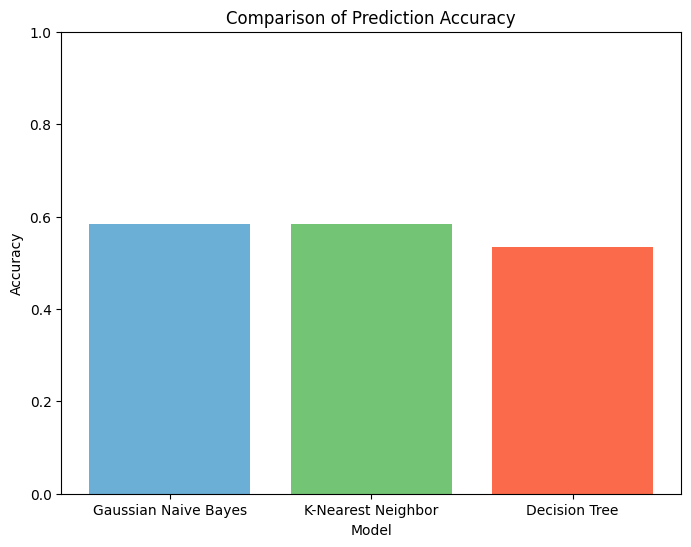

In [ ]:
# Data frame dari hasil prediksi
data = {
    'Model': ['Gaussian Naive Bayes', 'K-Nearest Neighbor', 'Decision Tree'],
    'Accuracy': [gnb_accuracy, knn_accuracy, dtc_accuracy]
}

df = pd.DataFrame(data)

# Plot bar plot
plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['Accuracy'], color=['#6baed6', '#74c476', '#fb6a4a'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Prediction Accuracy')
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1
plt.show()


#**EVALUATION**

##**Evaluate Results**

###**Klasifikasi**

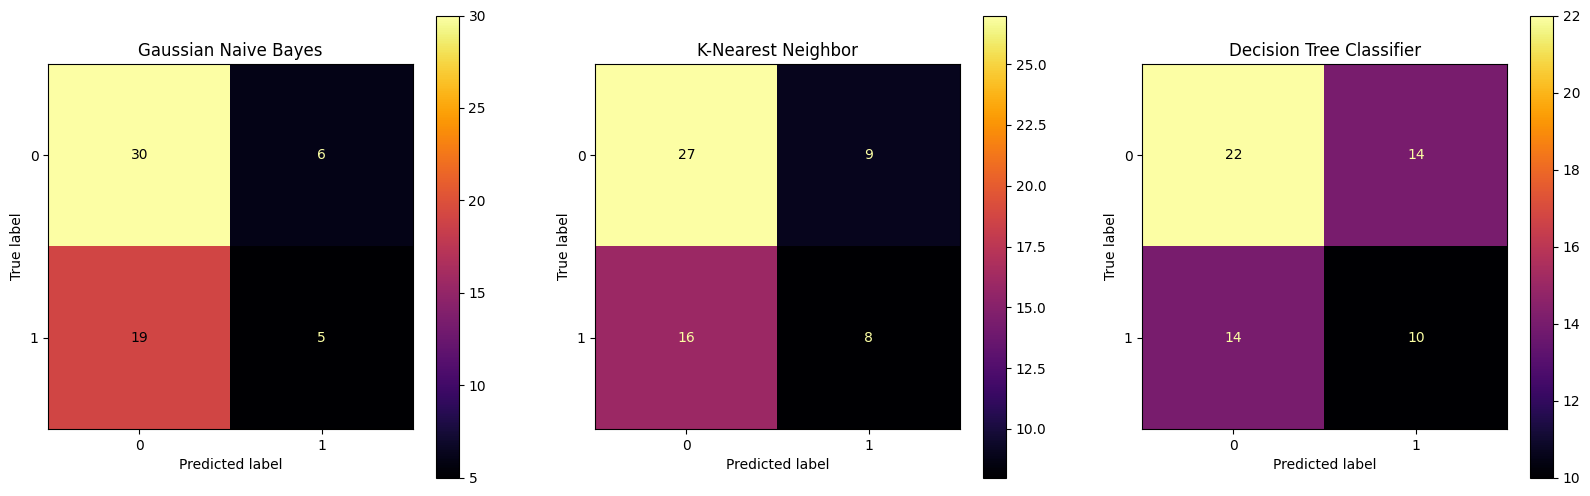

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Gambar diatas menunjukkan 3 grafik yang membandingkan 3 jenis algoritma klasifikasi: Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree Classifier. Grafik diatas menunjukkan performa algoritma dalam memprediksi label data yang benar.

Secara keseluruhan, model Gaussian Naive Bayes menunjukkan performa terbaik dalam memprediksi label data dengan benar dibandingkan dengan K-Nearest Neighbor dan Decision Tree Classifier.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Menghitung metrik evaluasi untuk setiap model
metrics_data = []

models = {"Gaussian Naive Bayes": gnb_pred, "K-Nearest Neighbor": knn_pred, "Decision Tree Classifier": dtc_pred}

for model_name, pred in models.items():
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    metrics_data.append({"Model": model_name,
                         "Accuracy": accuracy,
                         "Precision": precision,
                         "Recall": recall,
                         "F1 Score": f1,
                         "ROC AUC": roc_auc})

# Membuat dataframe dari data metrik evaluasi
metrics_df = pd.DataFrame(metrics_data)

# Menampilkan dataframe
print(metrics_df)

                      Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0      Gaussian Naive Bayes  0.583333   0.454545  0.208333  0.285714  0.520833
1        K-Nearest Neighbor  0.583333   0.470588  0.333333  0.390244  0.541667
2  Decision Tree Classifier  0.533333   0.416667  0.416667  0.416667  0.513889


Dari hasil matrix evaluasi, K-Nearest Neighbor menunjukkan kinerja terbaik dalam mengenali kelas positif dan negatif. Meskipun tingkat akurasinya sama dengan Gaussian Naive Bayes, K-Nearest Neighbor memiliki presisi dan recall yang lebih baik, serta F1 Score yang lebih tinggi. Sedangkan Decision Tree Classifier, meskipun akurasinya sedikit lebih rendah, masih menunjukkan performa yang seimbang antara presisi dan recall.

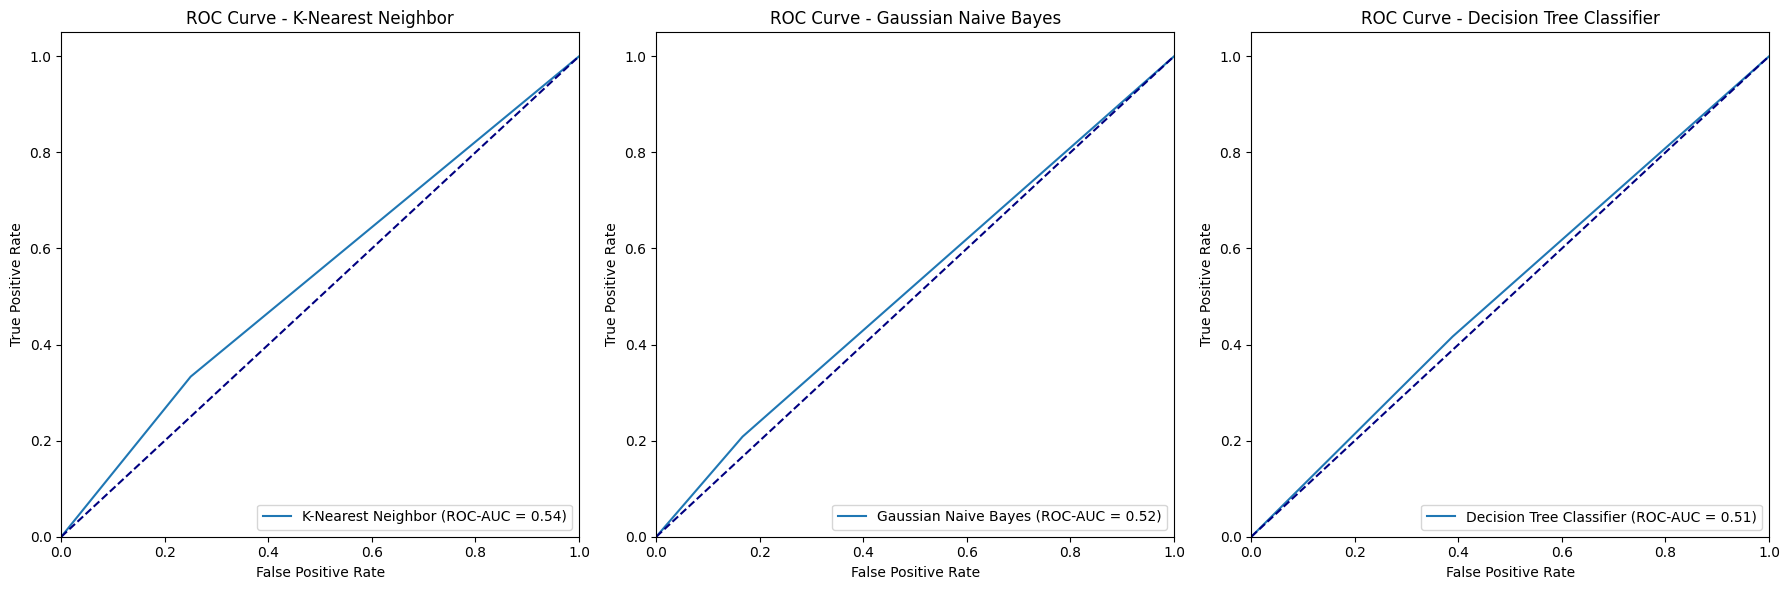

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Berdasarkan gambar diatas, kurva KNN memiliki AUC (Area Under Curve) tertinggi, yaitu 0,54. Ini menunjukkan bahwa KNN adalah model terbaik di antara ketiga model tersebut dalam membedakan antara kelas positif dan negatif.

##**Review Process**

###**Cross Validation**

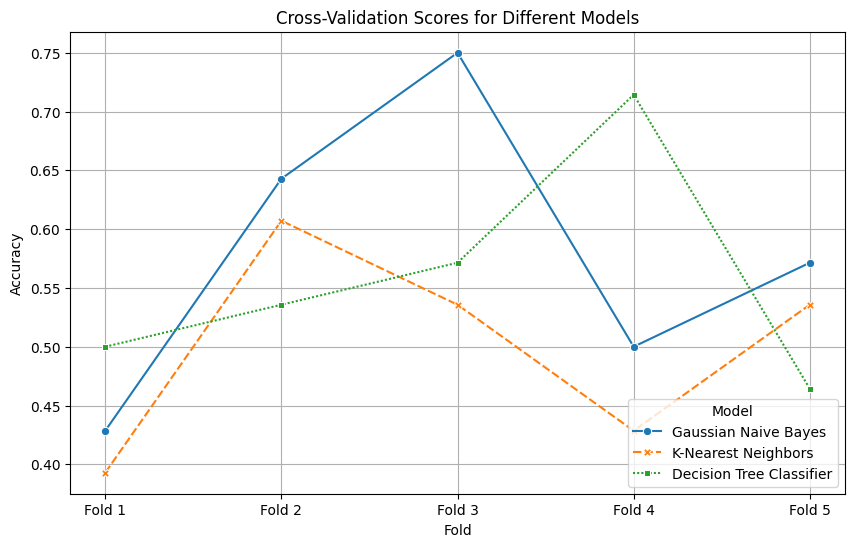

In [ ]:
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Berdasarkan gambar diatas, Gaussian Naive Bayes menunjukkan model klasifikasi terbaik di antara model yang dibandingkan, berdasarkan skor validasi silang.

###**Feature Selection**

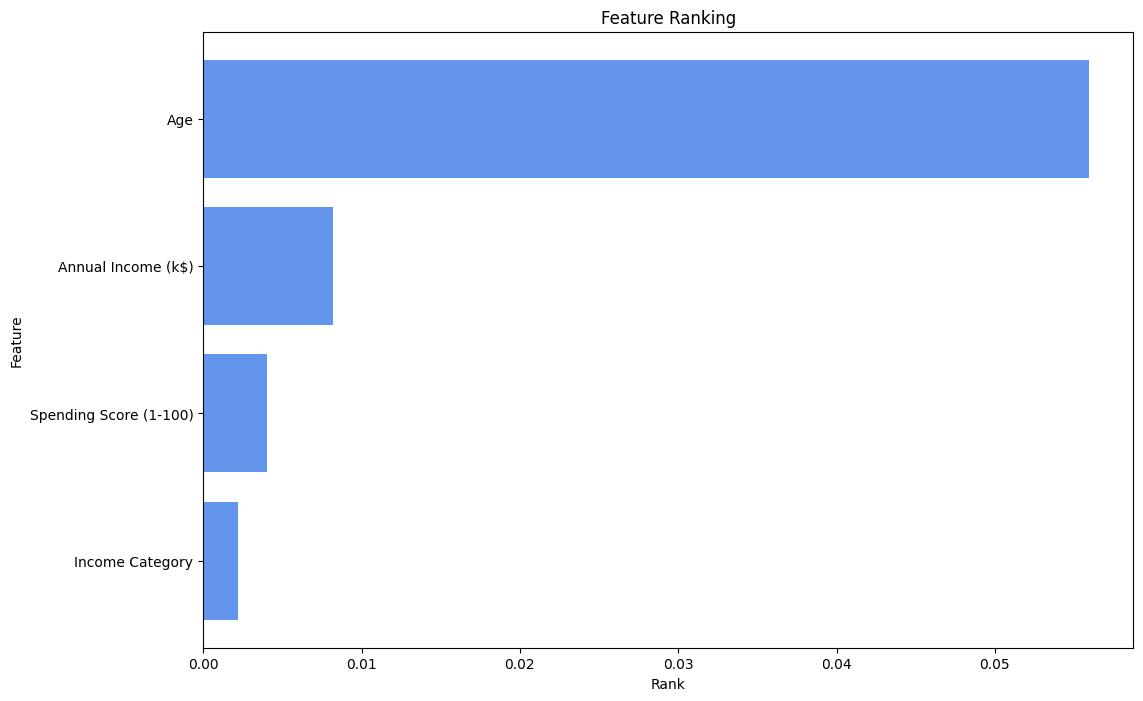

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k='all')

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_ranks_df.head(20)
plt.barh(top_features['Feature'], top_features['Rank'], color='cornflowerblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


Gambar diatas menunjukkan bahwa usia adalah faktor paling penting dalam segmentasi pelanggan mal. Hal ini mungkin karena usia dapat mencerminkan berbagai faktor yang mempengaruhi perilaku keuangan dan gaya hidup, seperti tahap kehidupan, pendapatan, dan preferensi.

###**Tuning Hyperparameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.1}
Akurasi sebelum tuning: 0.5833333333333334
Akurasi setelah tuning: 0.5833333333333334


Hasil tuning model Naive Bayes menunjukkan bahwa parameter terbaik yang dipilih adalah 'var_smoothing' dengan nilai 0.1. Meskipun terdapat perubahan dalam parameter terbaik, akurasi model sebelum dan sesudah tuning tetap sama, yaitu sebesar 58.33%. Hal ini menunjukkan bahwa pengaturan parameter tidak memiliki dampak yang signifikan terhadap kinerja model dalam kasus ini.

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik: ", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = knn.fit(x_train_norm, y_train).score(x_test_norm, y_test)
print("Akurasi sebelum tuning: ", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning: ", acc_after_tuning)

Parameter terbaik:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Akurasi sebelum tuning:  0.5833333333333334
Akurasi setelah tuning:  0.48333333333333334


Hasil tuning model K-Nearest Neighbors (KNN) menunjukkan bahwa parameter terbaik yang dipilih adalah 'n_neighbors' dengan nilai 7, 'weights' dengan 'uniform', dan 'metric' dengan 'euclidean'. Namun, terdapat penurunan akurasi model dari 58.33% sebelum tuning menjadi 48.33% setelah tuning. Hal ini menunjukkan bahwa pengaturan parameter yang dilakukan tidak menghasilkan peningkatan kinerja model, bahkan mengakibatkan penurunan performa yang signifikan.

In [ ]:
param_grid = {
    'max_depth': [ 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik: ", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = dtc.fit(x_train_norm, y_train).score(x_test_norm, y_test)
print("Akurasi sebelum tuning: ", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning: ", acc_after_tuning)

Parameter terbaik:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi sebelum tuning:  0.55
Akurasi setelah tuning:  0.55


Setelah melakukan tuning pada model Decision Tree Classifier (DTC), parameter terbaik yang dipilih adalah 'max_depth' dengan nilai 30, 'min_samples_leaf' dengan nilai 1, dan 'min_samples_split' dengan nilai 2. Meskipun tidak ada peningkatan akurasi dari nilai awal sebesar 0.55, hasil tuning berhasil mempertahankan akurasi pada nilai yang sama, yaitu 0.55. Artinya, model tidak mengalami perubahan signifikan dalam kinerjanya setelah tuning.

##**Determine Next Steps**

Berdasarkan hasil evaluasi yang telah dilakukan, model Gaussian Naive Bayes menunjukkan performa terbaik dalam memprediksi label data dengan akurasi sebesar 58.33% dan skor validasi silang yang baik. Meskipun K-Nearest Neighbor memiliki kinerja terbaik dalam mengenali kelas positif dan negatif serta memiliki AUC tertinggi dalam ROC curve, namun penurunan akurasi setelah tuning parameter menjadi 48.33% mengindikasikan bahwa model ini tidak konsisten dalam performanya. Sementara Decision Tree Classifier memiliki performa yang seimbang antara presisi dan recall, tetapi akurasinya yang juga tidak berubah setelah tuning menunjukkan bahwa model ini belum optimal untuk kasus ini. Dengan demikian, berdasarkan hasil tersebut, model **Gaussian Naive Bayes** adalah pilihan terbaik untuk klasifikasi pengelompokan pelanggan berdasarkan perilaku belanja mereka.